The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles

1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why 
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
vehicle_df=pd.read_csv("vehicle.csv")

In [3]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle_df.info()

## all variables are float or integer except class which is object type. We will be converting class into numeric form in the
## subsequent steps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
vehicle_df.shape

(846, 19)

In [6]:
vehicle_df.describe().T

## it can be seen that there are missing values in many features . We need to fix the missing values. This can be seen by
## looking at the count 

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [7]:
vehicle_df.isnull().sum()

## below details reflect the count of missing values in each feature/ variable which needs to be fixed 

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
#Replacing the missing values by median 
for i in vehicle_df.columns[:17]:
    median_value = vehicle_df[i].median()
    vehicle_df[i] = vehicle_df[i].fillna(median_value)

In [9]:
vehicle_df.isnull().sum()

## there are no missing values in the data which can be found now

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

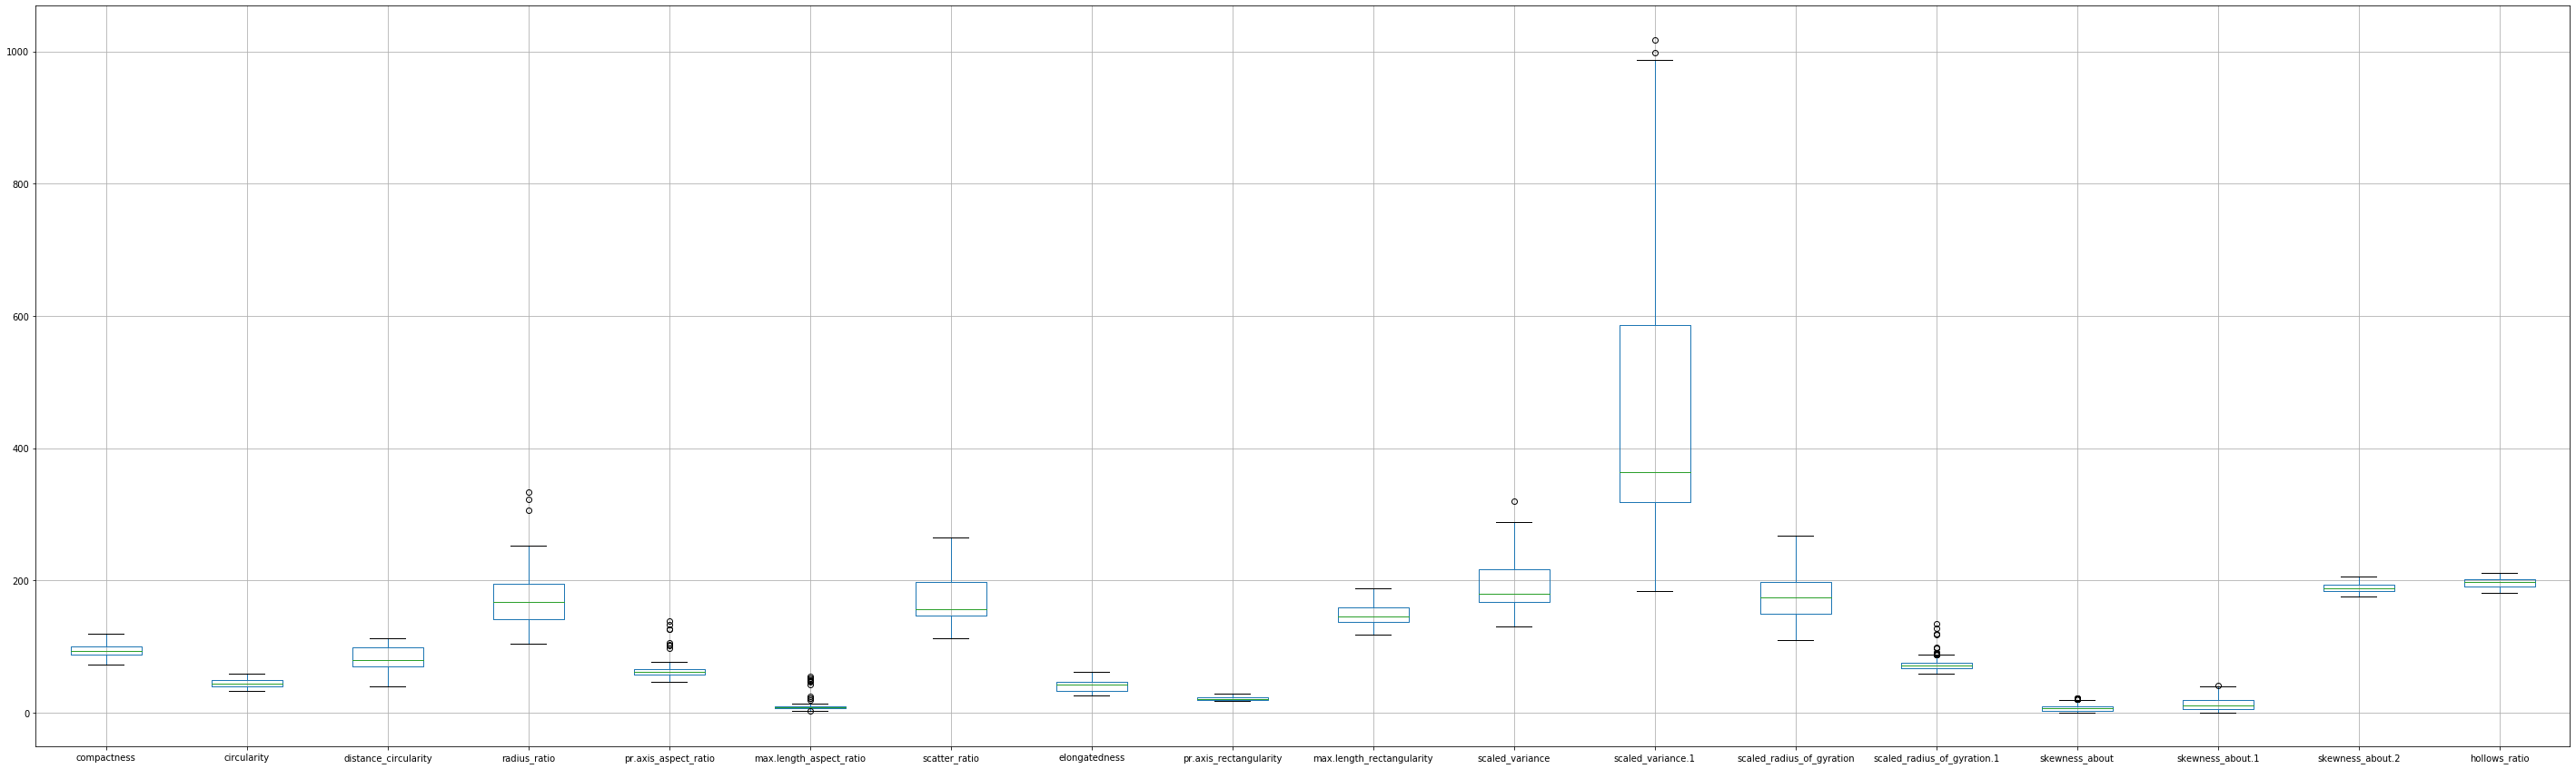

In [10]:
# Understand the spread and outliers in dataset using boxplot

vehicle_df.boxplot(figsize=(50,15))

## It is showing that there are some columns which contains outliers such as radius_ratio, pr.axis_aspect_ratio, 
## max.length_aspect_ratio, scaled_variance, scaled_variance.1,scaled_radius_of_gyration.1, skewness_about, skewness_about.1.

In [11]:
#find the outliers and replace them by median

for col_name in vehicle_df.columns[:-1]:
    q1 = vehicle_df[col_name].quantile(0.25)
    q3 = vehicle_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    lower_quartile = q1-1.5*iqr
    upper_quartile = q3+1.5*iqr
    
    vehicle_df.loc[(vehicle_df[col_name] < lower_quartile) | (vehicle_df[col_name] > upper_quartile), col_name] = vehicle_df[col_name].median()

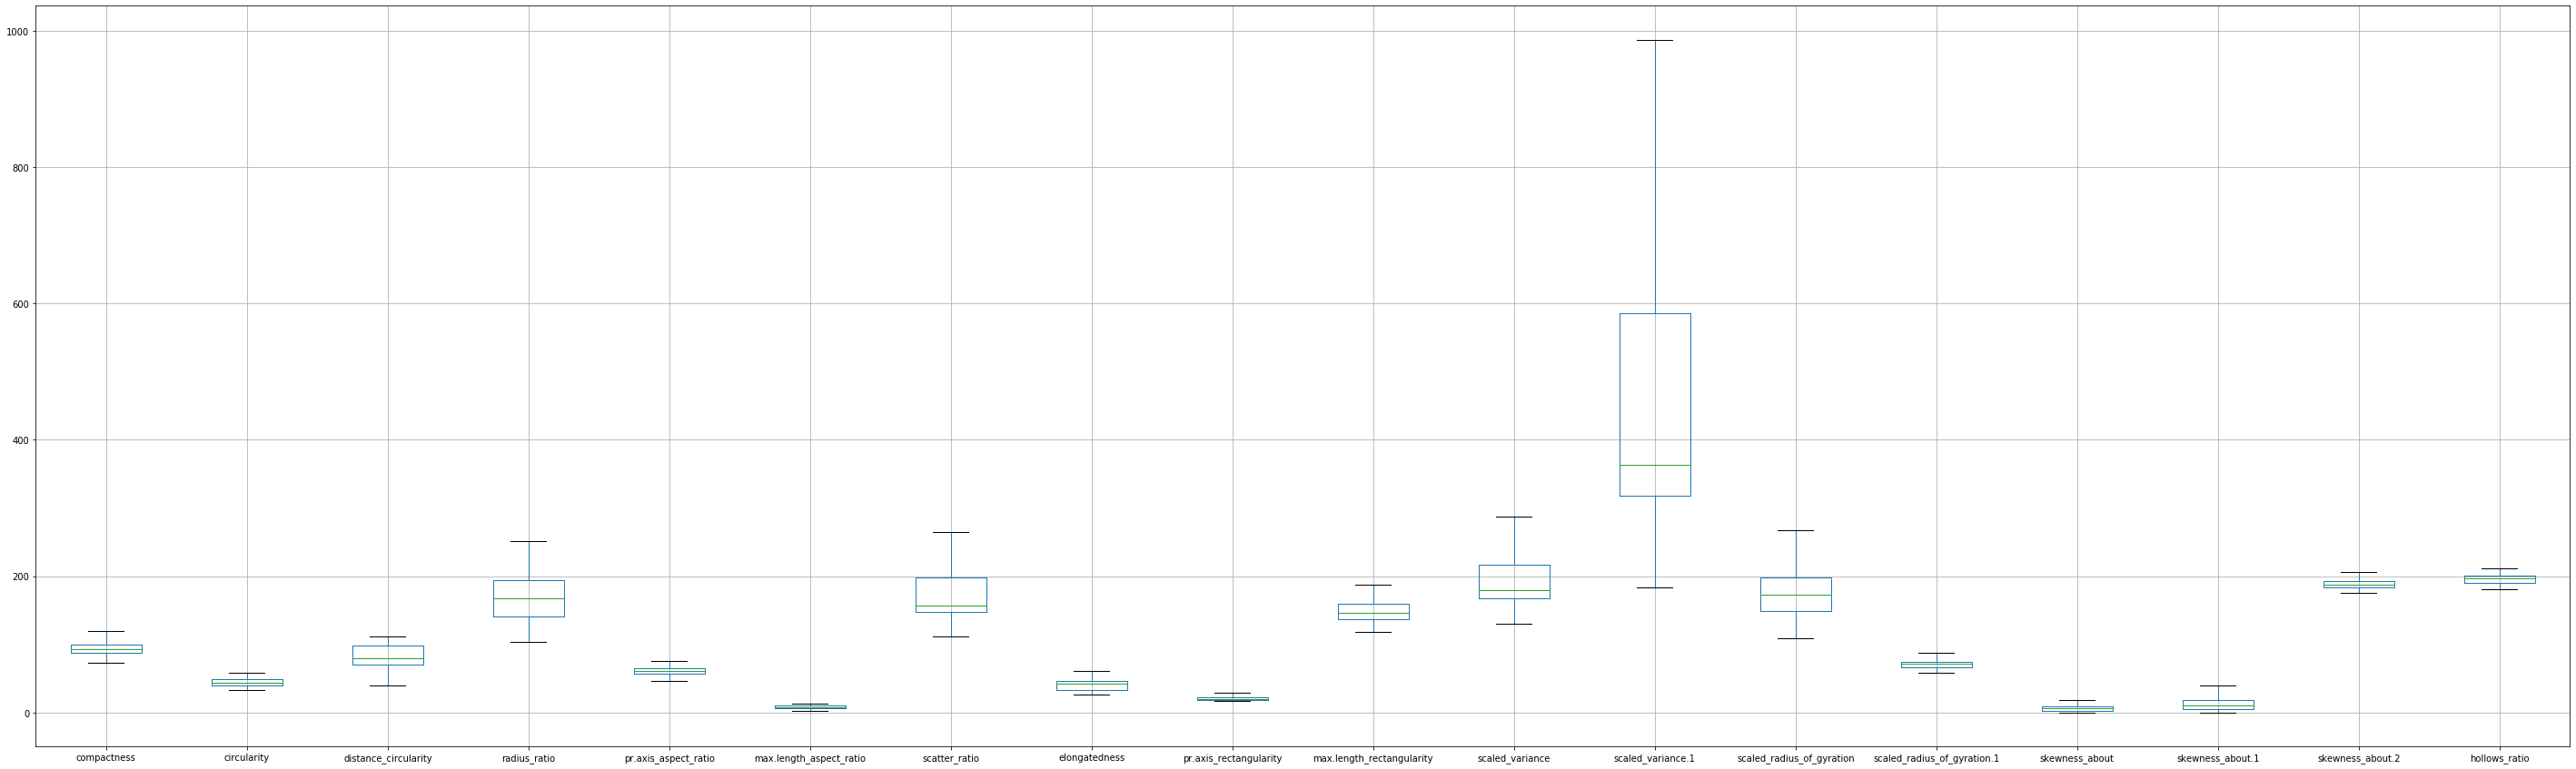

In [12]:
vehicle_df.boxplot(figsize=(50,15))

## after replacing the outliers with median we can see that they are not found in any of the columns/ features now

In [13]:
vehicle_df['class'].value_counts()

## showing the bifurcation of vehicles among car, bus and van count

car    429
bus    218
van    199
Name: class, dtype: int64

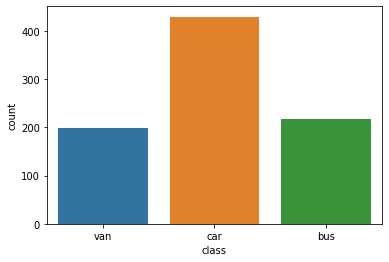

In [14]:
sns.countplot(vehicle_df['class'])

## plotting the bifurcation of vehicles among van,car and bus

In [15]:
#Encoding of categorical variables

labelencoder=LabelEncoder()
vehicle_df['class']=labelencoder.fit_transform(vehicle_df['class'])

In [16]:
vehicle_df.describe().T

## it shows all missing values have been replaced by the median. Also, class is label encoded 

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.330969   32.147908  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.154846    5.613458   47.0   57.00   
max.length_aspect_ratio      846.0    8.118203    2.064114    3.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.430260   31.034232  130.0  167.00   
scaled_variance.1            846.0  437.790780  174.346065  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   71.943853    6.158852   59.0   67.00   
skewness_about               846.0    6.147754    4.572950    0.0    2.00   
skewness_about.1             846.0   12.565012    8.877465    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 167.0  194.75  252.0  
pr.axis_aspect_ratio          61.0   65.00   76.0  
max.length_aspect_ratio        8.0   10.00   13.0  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  216.75  288.0  
scaled_variance.1            363.5  586.00  987.0  
scaled_radius_of_gyration    173.5  198.00  268.0  
scaled_radius_of_gyration.1   71.5   75.00   87.0  
skewness_about                 6.0    9.00   19.0  
skewness_about.1              11.0   19.00   40.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0  
class                          1.0    1.00    2.0

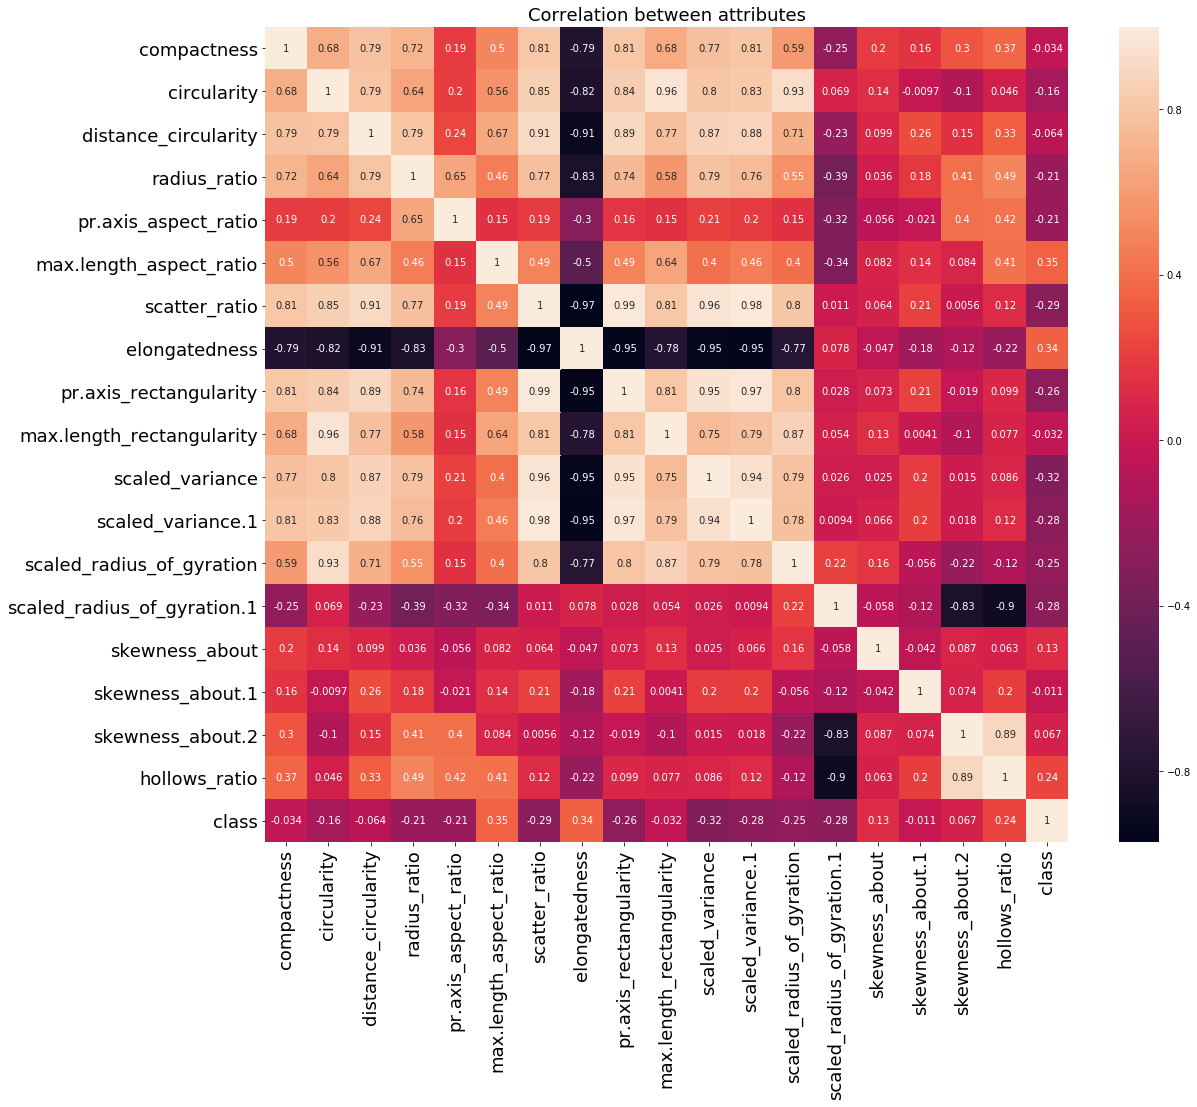

In [17]:
## correlation plot to show the relationship among independent variables as well as relationship of independent variables 
## with the dependent variable

fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(vehicle_df.corr(), annot=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

## scatter_ratio,pr.axis_rectangularity,scaled_variance.1 have high positive correlation
## distance_circularity,radius_ratio, scaled_variance has high positive correlation (>.70 in each case) and 
## elongatedness has high negative correlation with many independent variables like compactness, circularity,
## distance_circularity, radius_ratio, scatter_ratio,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,
## scaled_variance1, scaled_radius_of_gyration where high negative correlation of more than .75 can be seen. 
## A correlation of .70 or above is considered to be strong correlation among variables.
## There are other variables like max.length_aspect_ratio, max.length_rectangularity,scaled_radius_of_gyration that share a 
## correlation of >.50 with each other. If independent variables have high correlation among themselves , 
## it means they will be providing same type of information to the algorithm. It is important to decide on which features 
## must be included based on domain experience and by doing the PCA. If we drop the features without proper understanding 
## we may lose information which is relevant in the process of model building. Furthermore, many independent variables do 
## not show strong correlation with dependent variable (which is the class of vehicle), which is not a good sign
## max correlation which is shown with class variable by some independent variable is .35 by max.lenghth_aspect_ratio, .35 
## by elongatedness , negative correlation of .32 by scaled_variance . There are some more variables like radius_ratio, pr.axis
## aspect_ratio which show negative correlation of .21 with class , scatter_ratio with negative correlation of .29, -.26 by
## pr.axis_rectangularity , -.28 by scaled_variance.1, -.25 and -.28 by scaled_radius_of_gyration and scaled_radius_of_gyration1
## respectively with class variable. hollow_ratio has a positive correlation of .24. These variables where correlation is 
## seen with class (dependent variable) will be good for our analysis. However, strong correlation among many indepedent 
## variables can be seen, as stated above

## Whenever a dimension is dropped, lot of information contained in that dimension gets lost. Instead it is advisable
## to use PCA and create one composite dimension. Stronger the linear relationship, more redundant these dimensions become

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


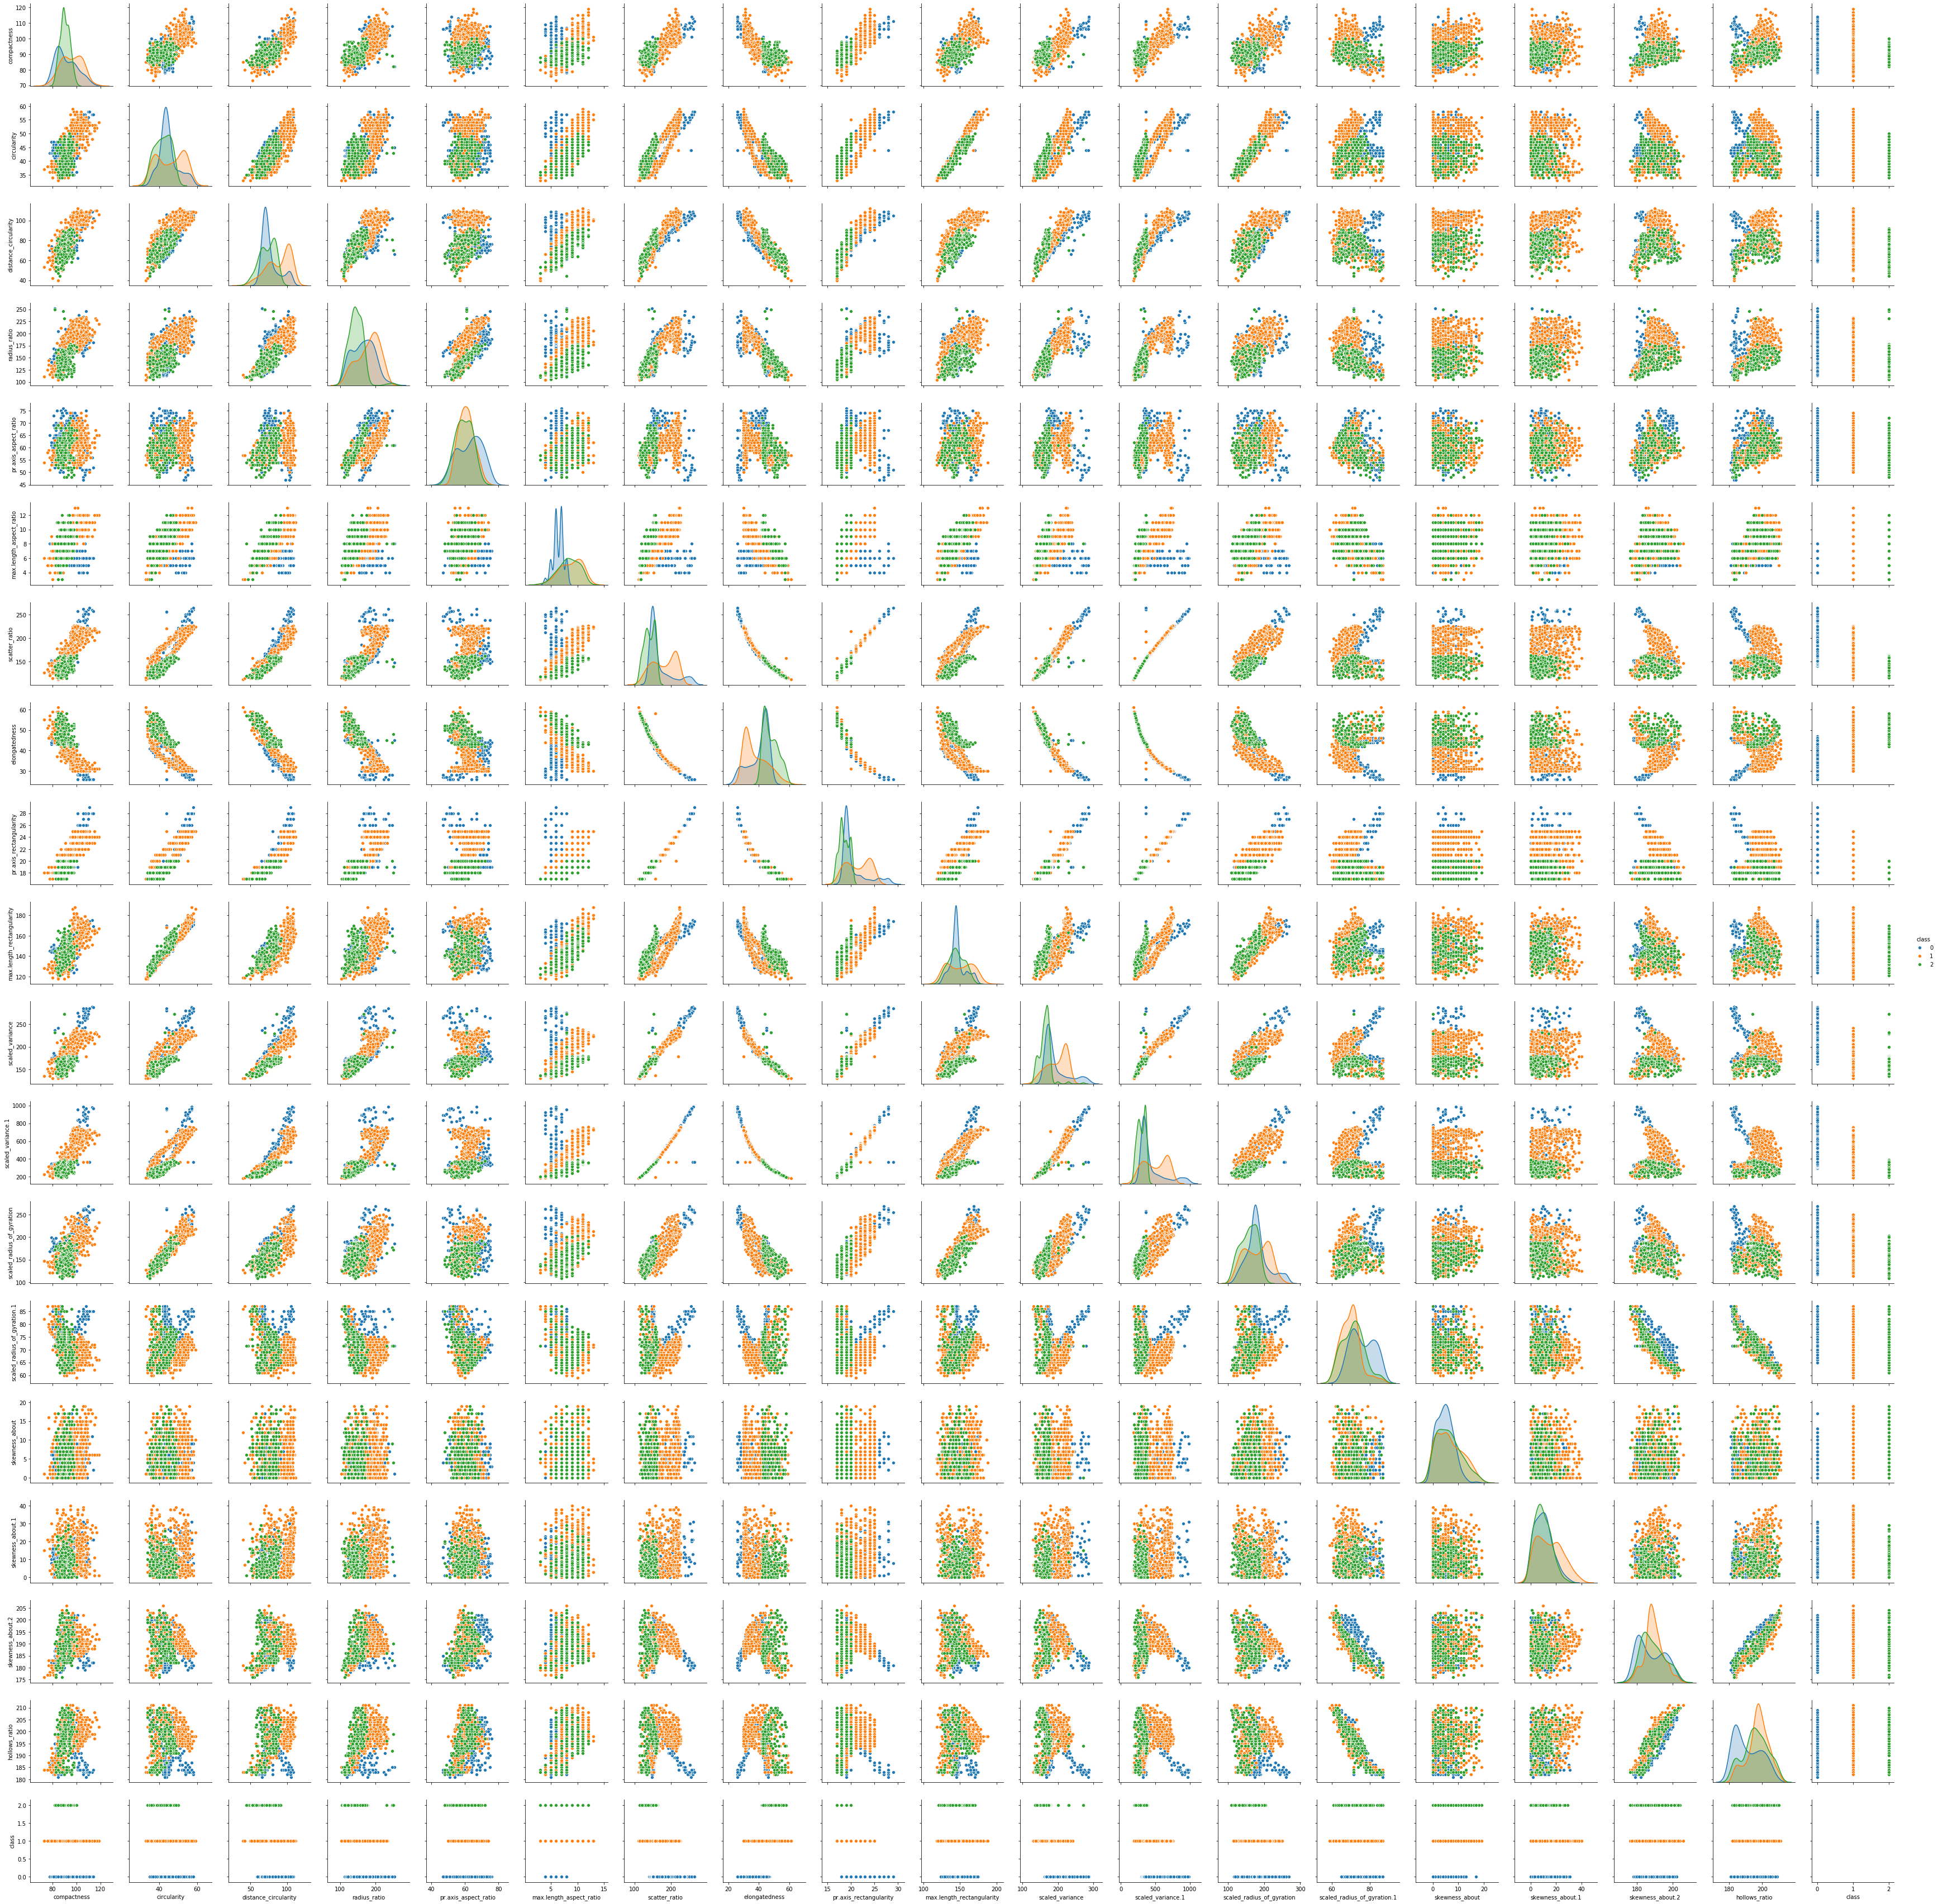

In [18]:
sns.pairplot(vehicle_df, hue='class',diag_kind='kde') 

## pr.axis_aspect ratio is showing no correlation among most independent attributes. There is cloud shape that can be seen
## hollow_ratio, skewness_about.2, skewness_about.1, skewness_about, scalar_radius_of_gyration.1 have (cloud shaped) no
## correlation among themselves in most of the independent variables as can be seen through pair panels. These variables must
## be considered in our analysis. However PCA is to be done to find out the number of attributes which should be considered
## for model building, without compromising on any information or without loss of any information in any of the attributes
## domain knowledge and awareness is also important for selection of attributes for model building 

## other independent variables are interacting with each other strongly. There is redundant dimensionality that can be seen 
## which will be address using PCA

In [21]:
# Split the vehicle data into separate training (70%) and test (30%) sets and then standardize it to unit variance:

X = vehicle_df.drop("class", axis=1)
y = vehicle_df["class"]

In [22]:
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  61.0                      8.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         71.5             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

In [23]:
X.shape

(846, 18)

In [24]:
y.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

In [25]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
X_train_Scaler=scaler.transform(X_train)

In [29]:
X_train_Scaler.shape

(592, 18)

In [30]:
X_test_Scaler=scaler.transform(X_test)

In [31]:
X_test_Scaler.shape

(254, 18)

In [32]:
svc_model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1],'kernel': ['linear', 'rbf']}
model_raw = GridSearchCV(svc_model, param_grid=params, cv=5)
model_raw.fit(X_train_Scaler, y_train)
print("Best Cross Validation Accuracy:{:.2f}".format(model_raw.best_score_))
print("Best Hyper Parameters:\n", model_raw.best_params_)
print("Test Set Accuracy:{:.2f}".format(model_raw.score(X_test_Scaler,y_test)))

## used SVC model with cost and kernel combinations on the original standardized data. Below results indicate the best
## accuracy score along with the best hyper parameters. Best test accuracy is seen as 97% which appears to be pretty good
## without getting into PCA at this stage 

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\skle

Best Cross Validation Accuracy:0.94
Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}
Test Set Accuracy:0.97


C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
## We transform (centralize) the entire X_train (independent variable data) to zscores through transformation. 
## We will create the PCA dimensions on this distribution. 
        
cov_matrix = np.cov(X_train_Scaler.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00169205  0.69255281  0.79733455  0.71155068  0.19200224  0.52932423
   0.81991179 -0.79274398  0.82296986  0.6939428   0.76717477  0.81265958
   0.59420609 -0.23748477  0.17512894  0.1261633   0.29731156  0.35905326]
 [ 0.69255281  1.00169205  0.79972482  0.65402916  0.21596742  0.58571225
   0.85040632 -0.82457531  0.84846367  0.96349864  0.80628051  0.82664249
   0.92509916  0.04849438  0.12165649 -0.00529679 -0.08939568  0.06667871]
 [ 0.79733455  0.79972482  1.00169205  0.79641668  0.24828448  0.69813182
   0.91043495 -0.91866787  0.89851608  0.78590997  0.86786434  0.88856279
   0.71290688 -0.23443171  0.09270825  0.24619487  0.15711896  0.34431448]
 [ 0.71155068  0.65402916  0.79641668  1.00169205  0.65286161  0.51025378
   0.7706782  -0.82682947  0.7425105   0.60414529  0.78504373  0.76133706
   0.55962945 -0.3889769   0.01289414  0.17401533  0.40164773  0.49942412]
 [ 0.19200224  0.21596742  0.24828448  0.65286161  1.00169205  0.16064004
   0.2032957

In [34]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72121558e-01 -7.42566629e-02 -7.80630552e-02 -1.30233352e-01
   1.14910060e-01  3.07287194e-01 -1.86221937e-01  7.43601662e-01
  -3.56068960e-01  4.51910227e-02  2.13740840e-01 -4.31826697e-02
  -1.29160094e-02  1.08757745e-01  9.47777575e-02 -4.81654919e-02
  -4.94720865e-02  2.63414669e-03]
 [-2.86821972e-01  1.26290064e-01 -1.71052633e-01  9.04392725e-02
  -1.39257849e-01 -1.20535119e-01  3.91450258e-01  7.82472403e-02
  -6.52753032e-02  2.42292599e-02 -2.02706998e-01 -1.56254063e-01
  -4.28631542e-02 -4.58374296e-01  4.77988366e-01 -7.83672441e-02
  -2.18850929e-01 -3.25976460e-01]
 [-3.02276750e-01 -4.24223056e-02  3.25584933e-02 -1.24902673e-01
  -8.22362709e-02 -1.51244456e-02 -1.78663524e-01 -2.51255965e-01
   5.45508009e-03  2.67172652e-01  3.10256888e-01 -6.92683042e-01
   6.54344685e-03 -6.90475750e-02 -7.19602932e-02  3.13698036e-01
   1.63965594e-01 -7.32574516e-02]
 [-2.69909880e-01 -1.91458004e-01  1.13204605e-01  2.22697800e-01
   1.43572237e-01 -

In [35]:
print("Eigen Values:")
pd.DataFrame(eigenvalues).transpose()

Eigen Values:


0         1         2         3         4         5         6   \
0  9.826306  3.336522  1.212637  1.120971  0.845863  0.635823  0.313958   

         7       8         9         10        11        12        13  \
0  0.228587  0.1282  0.084554  0.078454  0.062098  0.004961  0.021124   

         14        15        16        17  
0  0.022843  0.041169  0.034442  0.031945

In [36]:
print(eigenvectors[1])

[-0.28682197  0.12629006 -0.17105263  0.09043927 -0.13925785 -0.12053512
  0.39145026  0.07824724 -0.0652753   0.02422926 -0.202707   -0.15625406
 -0.04286315 -0.4583743   0.47798837 -0.07836724 -0.21885093 -0.32597646]


Cumulative Variance Explained [0.54498374 0.73003294 0.79728788 0.85945885 0.90637186 0.94163568
 0.95904833 0.97172618 0.97883638 0.98352587 0.98787705 0.99132109
 0.99360437 0.99551461 0.99728635 0.99855328 0.99972484 1.        ]


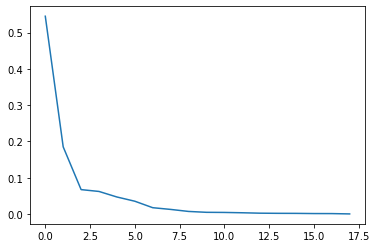

In [37]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%. This creates array of size= as many PC dimensions 
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_explained)

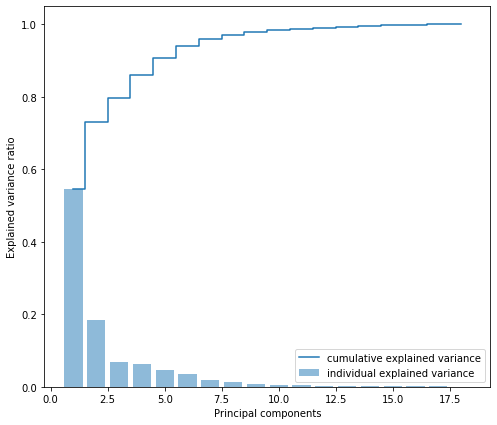

In [38]:
plt.figure(figsize=(8 , 7))
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [39]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.826305809585161, array([-0.27212156, -0.28682197, -0.30227675, -0.26990988, -0.10041817,
       -0.20423846, -0.30897201,  0.30784257, -0.30591267, -0.27976206,
       -0.29724514, -0.30368698, -0.26300564,  0.04554293, -0.03012775,
       -0.05438913, -0.04263468, -0.08984985])), (3.336521583064152, array([-0.07425666,  0.12629006, -0.04242231, -0.191458  , -0.26493201,
       -0.11833614,  0.07918894, -0.0143283 ,  0.09385148,  0.12025341,
        0.08570139,  0.07223905,  0.21024463,  0.50383303, -0.01539292,
       -0.07911138, -0.50168236, -0.50729566])), (1.2126373435926803, array([-0.07806306, -0.17105263,  0.03255849,  0.11320461,  0.10367751,
       -0.17432519,  0.09436155, -0.09920216,  0.08192032, -0.19736328,
        0.13953089,  0.09066404, -0.16837589,  0.10245272, -0.6512516 ,
        0.5904354 , -0.05879388, -0.04989971])), (1.1209709717779066, array([-0.13023335,  0.09043927, -0.12490267,  0.2226978 ,  0.61306105,
       -0.19833417, -0.03799754, -0.03734922, -0.0

In [40]:
eig_pairs[0]

(9.826305809585161,
 array([-0.27212156, -0.28682197, -0.30227675, -0.26990988, -0.10041817,
        -0.20423846, -0.30897201,  0.30784257, -0.30591267, -0.27976206,
        -0.29724514, -0.30368698, -0.26300564,  0.04554293, -0.03012775,
        -0.05438913, -0.04263468, -0.08984985]))

In [41]:
print(eigvalues_sorted[0])
print(eigvectors_sorted[0])

9.826305809585161
[-0.27212156 -0.28682197 -0.30227675 -0.26990988 -0.10041817 -0.20423846
 -0.30897201  0.30784257 -0.30591267 -0.27976206 -0.29724514 -0.30368698
 -0.26300564  0.04554293 -0.03012775 -0.05438913 -0.04263468 -0.08984985]


In [42]:
## P_reduce represents reduced mathematical space
## These steps are performing dimensionality reduction based on observation in above steps & from plotting the individual and
## cumulative explained variance 

P_reduce = np.array(eigvectors_sorted[0:10]).transpose()  # Reducing from 18 to 10 dimension space since it is covering 
## 95% of the variance atleast

Proj_train_data = np.dot(X_train_Scaler,P_reduce)   # projecting original data into principal component dimensions
Proj_test_data  = np.dot(X_test_Scaler,P_reduce)


Proj_data_df = pd.DataFrame(Proj_train_data)  # converting array to dataframe for pairplot to verify that correlation among
## independent variables is not seen now. If we also print the covariance matrix and heatmap , correlation among independent 
## variables will be a very small number, indicating that correlation is 0 now

In [43]:
Proj_train_data.shape

(592, 10)

In [44]:
Proj_test_data.shape

(254, 10)

In [45]:
print(y_train.shape)
print(y_test.shape)
X_train_Scaler.shape,X_test_Scaler.shape,P_reduce.shape,Proj_train_data.shape,Proj_test_data.shape

## checking the shape before and after dimensionality reduction

(592,)
(254,)


((592, 18), (254, 18), (18, 10), (592, 10), (254, 10))

In [46]:
cov_matrix_pca = np.cov(Proj_train_data.T)
print('Covariance Matrix \n%s', cov_matrix_pca)

## covariance matrix printed after using PCA

Covariance Matrix 
%s [[ 9.82630581e+00  5.53045107e-16  5.62062147e-16  4.68886069e-16
   8.05522222e-16  3.07481057e-15  1.20471409e-15  1.03771100e-15
  -5.33883898e-16 -5.85731877e-16]
 [ 5.53045107e-16  3.33652158e+00  2.85539593e-17  1.78086536e-15
   1.17221517e-16  2.35992838e-16  7.85233882e-16 -3.14093553e-16
  -5.13219848e-16  3.49410292e-16]
 [ 5.62062147e-16  2.85539593e-17  1.21263734e+00 -5.34710460e-15
   2.02883395e-16  4.50851990e-17  5.29751088e-17 -5.30103316e-17
  -1.45024057e-16 -1.49908287e-16]
 [ 4.68886069e-16  1.78086536e-15 -5.34710460e-15  1.12097097e+00
  -9.88868697e-16  6.23678586e-16 -4.28309390e-17  9.20489479e-17
  -1.70196626e-16 -2.79903944e-16]
 [ 8.05522222e-16  1.17221517e-16  2.02883395e-16 -9.88868697e-16
   8.45862989e-01 -1.01253843e-16  7.26153486e-16 -4.73394589e-16
   2.77180046e-16 -2.00370835e-16]
 [ 3.07481057e-15  2.35992838e-16  4.50851990e-17  6.23678586e-16
  -1.01253843e-16  6.35822828e-01  5.05705648e-16  3.24613433e-16
   7.213631

In [47]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix_pca)
print('Eigen Vectors \n%s', eigen_vectors)
print('\n Eigen Values \n%s', eigen_values)

## after using PCA it can be clearly seen that values off diagnols are very small values close to 0. This implies that PCA 
## has worked effectively to reduce the correlation among independent features to 0. This can be easily stated that now
## no information is stored in the mathematical space which has not been captured in our analysis. Visual representation 
## can also be seen in the form of pair panels below

Eigen Vectors 
%s [[-1.00000000e+00  8.52177959e-17 -6.52523544e-17  5.38619224e-17
   8.96973833e-17  3.34564633e-16 -1.26647397e-16  1.08120592e-16
  -6.01259265e-17 -5.50503278e-17]
 [-7.59673767e-17 -1.00000000e+00 -3.90980271e-16  8.32641438e-16
   4.82923021e-17 -6.96902146e-17 -1.64347175e-16 -2.09523570e-16
   1.68755818e-16 -9.30906353e-17]
 [-6.44623965e-17 -3.78158111e-16  1.00000000e+00 -5.67311194e-14
  -9.38927308e-17 -1.75778878e-15 -1.61736577e-17 -6.95780410e-17
  -2.74389159e-16 -2.57879251e-16]
 [-5.33172850e-17 -9.58164734e-16 -6.19573837e-14 -1.00000000e+00
  -4.21969892e-15  1.67959430e-15  1.05401588e-16  1.97197547e-16
  -1.18165840e-16  3.92811405e-17]
 [-8.92306763e-17 -1.48692662e-16 -6.14265395e-17  4.33266566e-15
  -1.00000000e+00  2.77140867e-16 -1.37742287e-15 -6.12788285e-16
  -2.34309520e-16  2.10462189e-16]
 [-3.33713734e-16 -1.69890910e-16 -2.25421529e-15 -1.72891482e-15
  -8.23653218e-17 -1.00000000e+00 -2.24638189e-15  1.10233715e-15
  -2.07663454e-

In [48]:
print(eigen_vectors[0])

## values off diagnols are very small values close to zero using using PCA. This can be seen across dimensions above in 
## covariance matrix 

[-1.00000000e+00  8.52177959e-17 -6.52523544e-17  5.38619224e-17
  8.96973833e-17  3.34564633e-16 -1.26647397e-16  1.08120592e-16
 -6.01259265e-17 -5.50503278e-17]


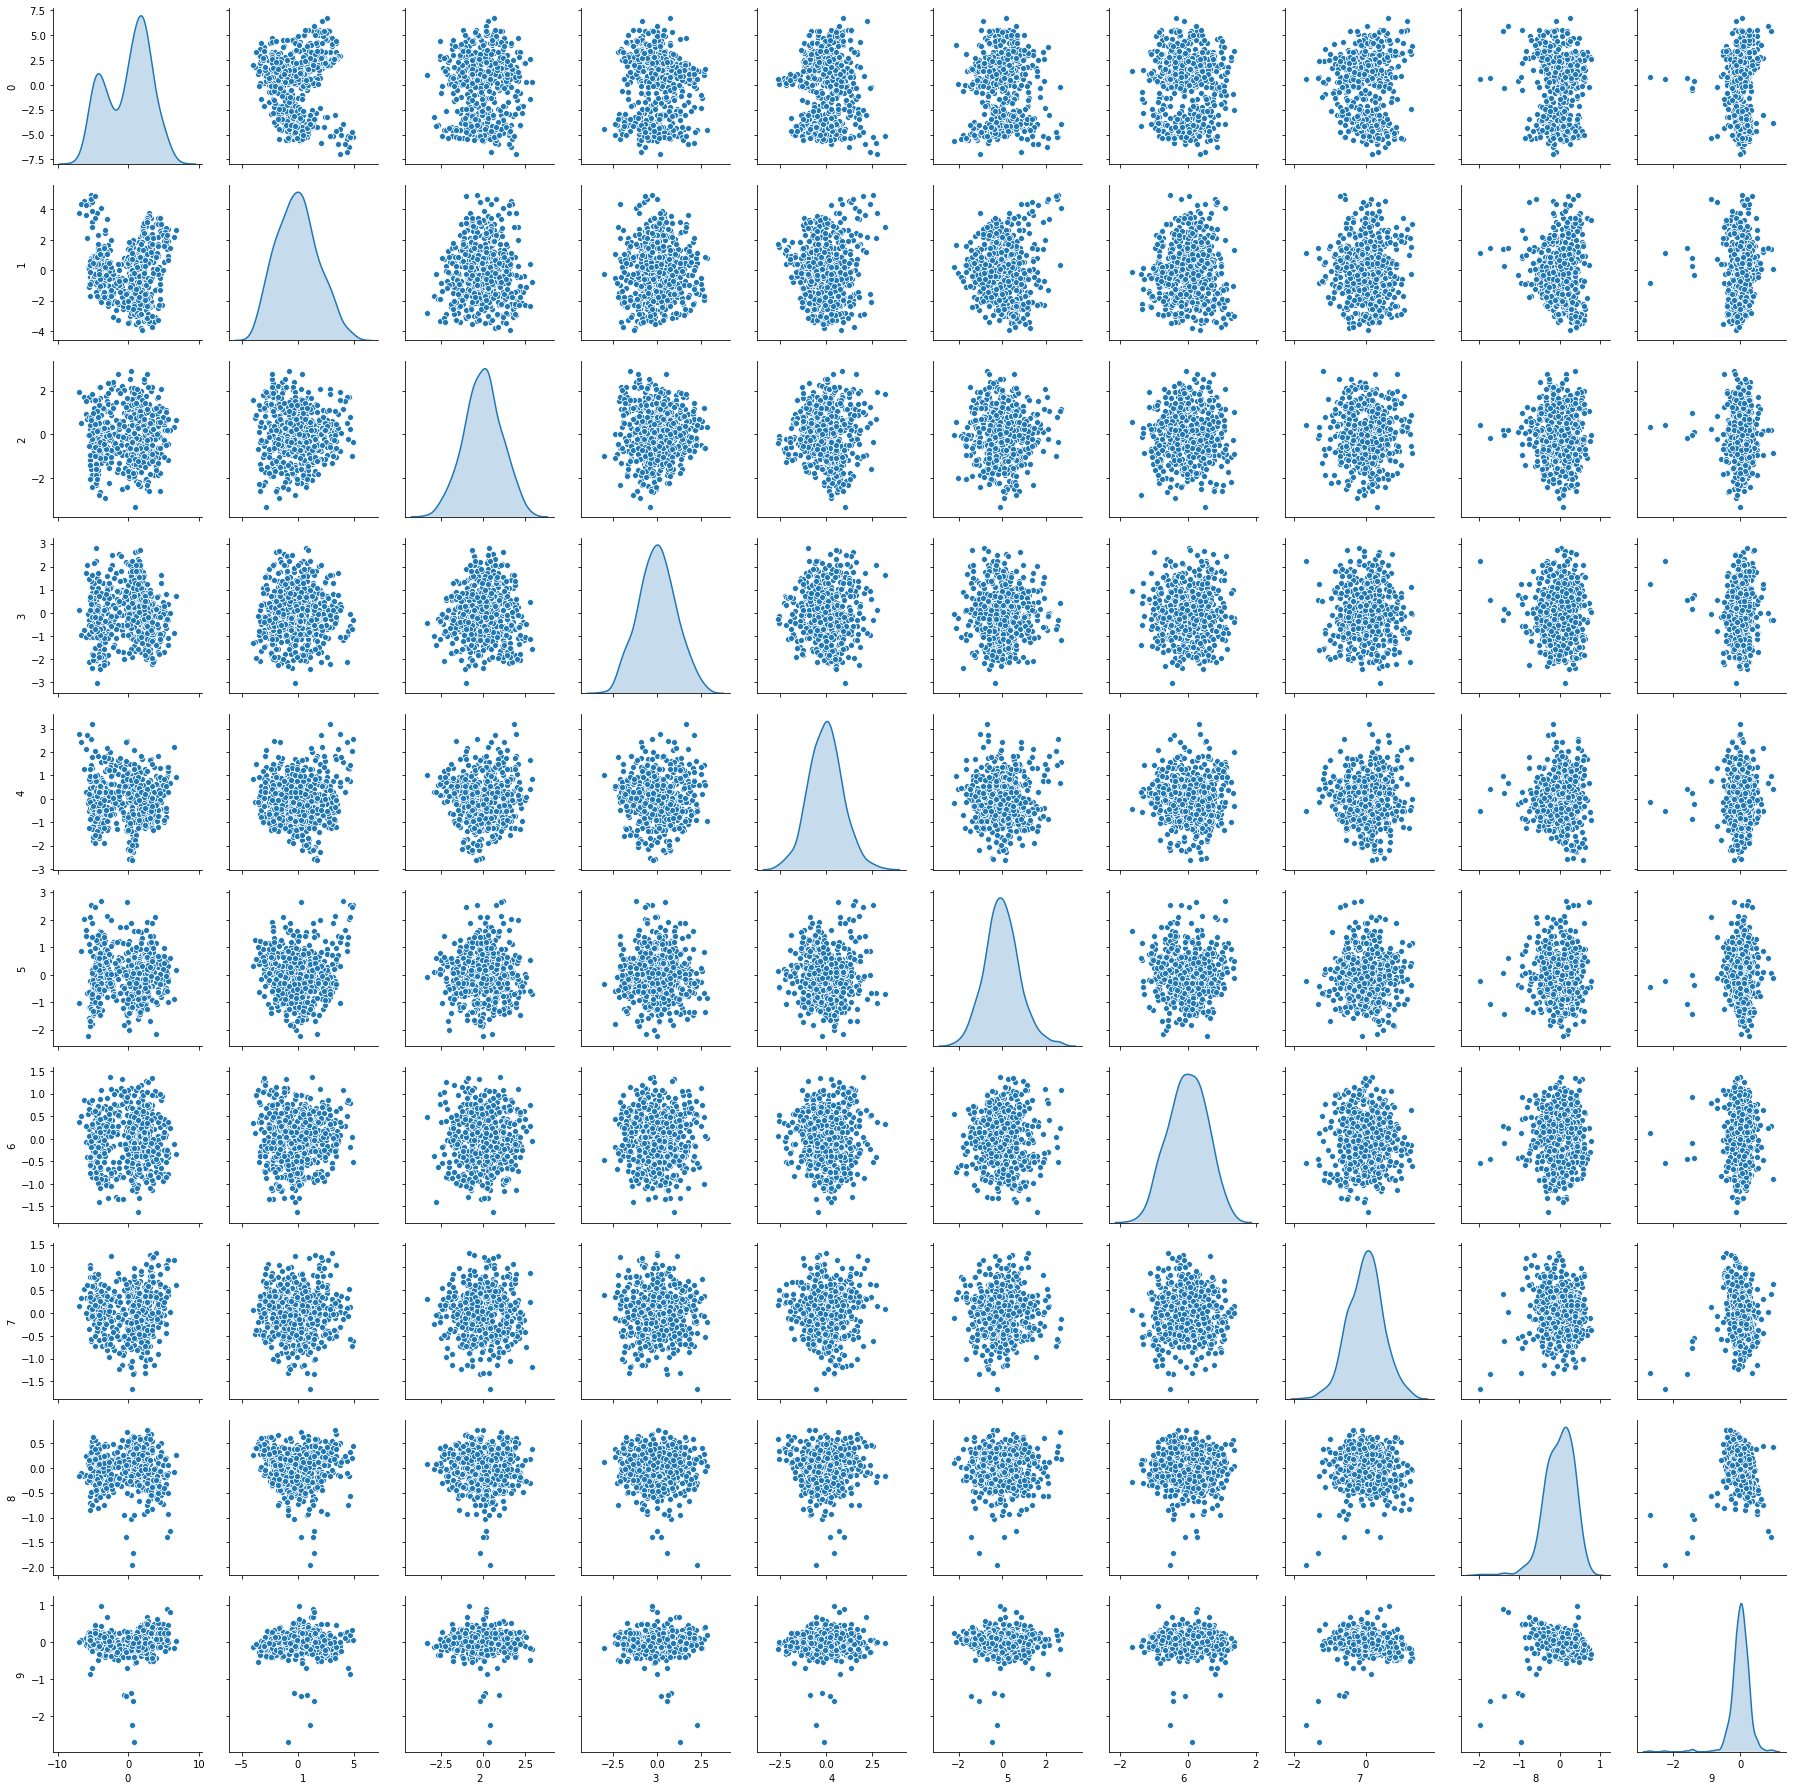

In [49]:
sns.pairplot(Proj_data_df,diag_kind='kde') 

## it can be seen from the pair plots that correlation among independent variables is not found. There is cloud shape
## that is clearly visible across various attributes , so PCA appears to have done a good job here. Correlation is shown
## on 10 dimensions which are created after applying PCA and after reduction of dimensionality from 18 to 10

In [50]:
pca=decomposition.PCA(n_components=10)
pca.fit(Proj_data_df)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
pca.components_.shape

(10, 10)

In [52]:
X_train_pca=pca.transform(Proj_train_data)
X_test_pca=pca.transform(Proj_test_data)
print(X_train_pca.shape)
print(X_test_pca.shape)

(592, 10)
(254, 10)


In [53]:
X_train_pca

array([[-0.41400977, -0.308587  , -0.10415554, ...,  0.55715587,
         1.02170249,  1.37972164],
       [-3.98268951,  1.69229395, -0.54438479, ..., -0.31495556,
        -0.19040394, -0.01506328],
       [ 2.08977816, -1.18494533, -2.27841755, ...,  0.35910539,
         0.20682109, -0.16947926],
       ...,
       [-3.40389632, -2.99918461,  0.90241179, ...,  0.00885732,
        -0.37096187,  0.1030477 ],
       [ 5.39222182, -0.09190721,  2.06125353, ..., -0.34686473,
         0.16749984, -0.05280466],
       [-1.12928384, -1.22780385, -1.43279929, ...,  0.06062821,
        -0.39200598, -0.11714066]])

In [54]:
X_test_pca

array([[ 0.23420956,  1.00867132,  1.13133405, ..., -0.29587705,
         0.12863269, -0.15930788],
       [-0.36941502, -1.67103019,  0.17658064, ..., -0.54657073,
        -0.02932151, -0.2540497 ],
       [ 0.28498235,  0.50112717,  0.02811354, ..., -0.47345994,
        -0.30981148,  0.01836526],
       ...,
       [-2.14444716, -2.25568141, -2.19878136, ...,  0.07794115,
         0.62920751, -0.38440726],
       [-3.02325812,  3.55112407, -0.78433682, ..., -0.34080877,
        -0.16230704,  0.20051113],
       [ 4.76365068,  0.91160488,  0.82167834, ..., -0.36457992,
        -0.0756087 ,  0.01683401]])

In [55]:
## building a support vector machine on train data using various combinations of cost and kernel at different steps 

svc_model=SVC(C=.01,kernel='linear')
#svc_model.fit(Proj_train_data,y_train)
#svc_model.score(Proj_train_data,y_train)

In [56]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

0.8631756756756757

In [57]:
svc_model.score(X_test_pca,y_test)

0.9015748031496063

In [58]:
svc_model=SVC(C=.05,kernel='linear')

In [59]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

0.8800675675675675

In [60]:
svc_model.score(X_test_pca,y_test)

0.8976377952755905

In [61]:
svc_model=SVC(C=.5,kernel='linear')

In [62]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

0.9037162162162162

In [63]:
svc_model.score(X_test_pca,y_test)

0.8858267716535433

In [64]:
svc_model=SVC(C=1,kernel='linear')

In [65]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

0.9037162162162162

In [66]:
svc_model.score(X_test_pca,y_test)

0.8779527559055118

In [67]:
svc_model=SVC(C=.01,kernel='rbf')

In [68]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5101351351351351

In [69]:
svc_model.score(X_test_pca,y_test)

0.5

In [70]:
svc_model=SVC(C=.05,kernel='rbf')

In [71]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7077702702702703

In [72]:
svc_model.score(X_test_pca,y_test)

0.7125984251968503

In [73]:
svc_model=SVC(C=.5,kernel='rbf')

In [74]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9662162162162162

In [75]:
svc_model.score(X_test_pca,y_test)

0.968503937007874

In [76]:
svc_model=SVC(C=1,kernel='rbf')

In [77]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.972972972972973

In [78]:
svc_model.score(X_test_pca,y_test)

0.9645669291338582

In [79]:
svc_model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1],'kernel': ['linear', 'rbf']}
model_final = GridSearchCV(svc_model, param_grid=params, cv=5)
model_final.fit(X_train_pca, y_train)
print("Best Cross Validation Accuracy:{:.2f}".format(model_final.best_score_))
print("Best Hyper Parameters:\n", model_final.best_params_)
print("Test Set Accuracy:{:.2f}".format(model_final.score(X_test_pca,y_test)))

## doing cross validation using grid search and looking for best parameters which shall give the best test accuracy
## once the best parameters and accuracy is derived, it shall be used for the model building 

## It is imperative to know that there is 1% drop in test accuracy , in comparison to what we got when PCA was not applied
## and best hyper parameters and scores were found on original standardised data.We are getting cross validation accuracy and 
## best scores as 93% and 96% as against 94% and 97% respectively. So PCA has not improved the performance of the model
## the cost and kernel however returned in both cases is a cost of 1 and kernel rbf

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\skle

Best Cross Validation Accuracy:0.93
Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}
Test Set Accuracy:0.96


C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
svc_model=SVC(C=1,kernel='rbf')

In [81]:
svc_model.fit(X_train_pca,y_train)
svc_model.score(X_train_pca,y_train)

C:\Users\KOMAL KHULLAR\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.972972972972973

In [82]:
svc_model.score(X_test_pca,y_test)

0.9645669291338582

In [83]:
## Tried cost of .01, .05, .5 and 1 along with kernel linear and rbf. The scores on train and test are shown using all these
## combinations. Upon conducting the cross validation to find out the best hyper parameters using grid search , kernel rbf along
## with cost of 1 is found to be the best combination to yield a test accuracy score of 96%.

In [84]:
y_predict_train=model_final.predict(X_train_pca)

## predicting the labels on train using the PCA dimensions as the final output

In [85]:
y_predict_train

array([2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0, 0,
       1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1,
       2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2,
       1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2,

In [86]:
y_predict=model_final.predict(X_test_pca)

## predicting the labels on test using the PCA dimensions as the final output

In [87]:
y_predict

array([2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0,
       1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1])

In [95]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_train,y_predict_train))
print("Classification Report:\n",metrics.classification_report(y_train,y_predict_train))

## printing the confusion matrix, preicison, recall and f1 scores using the PCA dimensions on train data  as the final output
## for one view across various matrices 

Confusion Matrix:
 [[150   1   1]
 [  2 293   7]
 [  1   4 133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       152
           1       0.98      0.97      0.98       302
           2       0.94      0.96      0.95       138

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592



In [96]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_predict))
print("Classification Report:\n",metrics.classification_report(y_test,y_predict))

## printing the confusion matrix, preicison, recall and f1 scores using the PCA dimensions on test data  as the final output
## for one view across various matrices 

Confusion Matrix:
 [[ 65   1   0]
 [  0 123   4]
 [  2   2  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.97      0.97       127
           2       0.93      0.93      0.93        61

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



In [97]:
## some points to note and mention:

## independent variables are strongly interacting with each other. Correlation is close to 1 in many . Its providing the same
## information to the algorithm. We are being exposed to the curse of dimensionality. With PCA we have tried to address 
## the challenge of dimensionality. It has helped in eliminating the dependency between independent dimensions by removing
## redundant dimensions. PCA captures the information stored in mathematical space. After reducing the dimesnions using 
## PCA , it can be seen that pair plots reflect no correlation among indepedent features, shown by printing a covariance
## matrix and scatter plots in pair panels are in the form of clouds across all dimensions.

## For PCA most important condition is there should be very strong correlation between dimensions. When  data is not showing
## linear trend/ relationship , and apply PCA, then output of applying PCA may not be effective. In this case, all dimesnsions
## in the feature space do not have very strong correlation. There is strong correlation in certain attributes as stated point 
## wise above, but not all dimesnions have linear relationship. 

## we have built our model using 10 dimension mathematical space instead of 18 dimensions without losing much information